# W207 Final Project Baseline

- Authors: Christian Millsop, Chris Ventura, Stanley Ye
- Kaggle Project: [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data)
- GitHub Repo: [w207_final_airbnb](https://github.com/cmventura/w207_final_airbnb)

## Table of Contents

- Introduction
- Dataset Descriptions
- Description of Approach
- Setup and Data Cleaning
- Exploratory Data Analysis
- Full Structure of Solution
- References

# Introduction

For this paper, we will use various machine learning models to complete the Airbnb new user bookings Kaggle competition.  This competition was originally designed as a recruiting tool for Airbnb.  The stated goal of this competition is to predict in which country a new user will make their first booking<sup>[1]</sup>.  To complete this challenge, Airbnb and Kaggle have provided several datasets consisting of user demographics, summary statistics, and web session information to try to predict a target variable consisting of the country in which a user made their first booking.  Given that our core problem is to predict where users will make their first booking, we will attempt to answer the following research question: What is the relationship of a user profile and online activity within the Airbnb website to the travel destination?

To answer this question we will optimize and combine several machine learning models to generate accurate destination predictions.  We will be using both derived and raw features from the datasets as inputs to these models.  Using known best practices<sup>[2][3]</sup> to examine the effect of the various features on the end predictions.  This will show both the effectiveness of various models as well as the relative importance of each feature at predicting accurate destinations.  After examination, we will be able to answer our initial research question by identifying which aspects of a user’s profile and online activity have a relationship to the selection of one or more travel destinations.

While we will be optimizing our models to accurately predict the destination country, the Kaggle competition allows for up to five predictions per user.  The competition uses the following Normalized Discounted Cumulative Gain (NDCG) formula to score results<sup>[4]</sup>:

<img src="ndcg_formula.png" align="center"/>

# Dataset Descriptions

## Dataset: age_gender_bkts:

This dataset contains the population, in thousands, aggregated at the following dimensions: year, age bucket, destination country, and gender.

| Column                  | Description                                                                                           |
|-------------------------|-------------------------------------------------------------------------------------------------------|
| age_bucket              | five-year age interval buckets, with a single bucket for 100+                                         |
| country_destination     | the destination country dimension, can be US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', or 'AU' |
| gender                  |  the gender dimension, can be 'male' or 'female'                                                      |
| population_in_thousands | the population for the specific set of dimensions                                                     |
| year                    | the year dimension                                                                                    |

## Dataset: countries

This dataset lists summary information for each possible destination country.

| Column                        | Description                                                                                                           |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| country_destination           | the destination country dimension, can be US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', or 'AU'                 |
| lat_destination               | the latitude of the destination country                                                                               |
| lng_destination               | the longitude of the destination country                                                                              |
| distance_km                   | the distance in kilometers of the country from the United States                                                      |
| distance_km_2                 | unknown                                                                                                               |
| destination_language          | the primary spoken language of the destination country                                                                |
| language_levenshtein_distance | a measure of similarity between the destination_language and English, with a lower number representing a closer match |

## Dataset: sample_submission_NDF

This dataset contains the Kaggle submission format, consisting of the user ID and destination country.  According to the competition documentation, there can be up to five entries per user ID, with the lower index rank being the higher choice, which impacts the ultimate score returned in the scoring formula.

| Column  | Description                       |
|---------|-----------------------------------|
| id      | the user id                       |
| country | the predicted destination country |

## Dataset: sessions

This dataset contains user session data, broken out by user action.  This data will be used to examine if user behavior patterns can be indicative of the user’s end destination choice.

| Column        | Description                                               |
|---------------|-----------------------------------------------------------|
| user_id       | the user id, used to connect to other datasets            |
| action        | the action taken by the user                              |
| action_type   | the category of the action                                |
| action_detail | further detail of the action                              |
| device_type   | the device on which the user performed the action         |
| secs_elapsed  | the time elapsed between this action and the prior action |

## Dataset: train_users_2

This dataset contains the user id, target variable of destination country, as well as demographic and account detail information.

| Column                  | Description                                                                        |
|-------------------------|------------------------------------------------------------------------------------|
| id                      | the user id, used to connect to other datasets                                     |
| date_account_created    | the date on which the user first created the account                               |
| timestamp_first_active  | the timestamp of when the user was first active, can predate account creation  |
| date_first_booking      | the date of the user's first booking, will be 'NaN' in event the user did not book |
| gender                  | the gender of the user, if known                                                   |
| age                     | the age of the user, if known                                                      |
| signup_method           | the user's method for account signup                                               |
| signup_flow             |                                                                                    |
| language                | the user's selected language                                                       |
| affiliate_channel       | indicates the channel through which the user was directed to the website           |
| affiliate_provider      | indicates the provider of the channel, if applicable                               |
| first_affiliate_tracked | indicates the first affiliate through which the user was tracked, if applicable    |
| signup_app              | indicates which app the user used to create an account                             |
| first_device_type       | indicates the first device identified for the user                                 |
| first_browser           | indicates the first browser identified for the user                                |
| country_destination     | the target variable; the ultimate destination selection by the user                |

# Description of Approach

## Initial Pipeline

To start, we plan to construct an initial, bare-bones pipeline that will use only the (users) training dataset, while skipping all other datasets (e.g., sessions), to train a single classifier (e.g., KNN) and then generate an accuracy score on the test dataset.  In this initial pipeline, we will omit more complex operations, such as data processing and feature engineering, with the goal of generating results that can be submitted to Kaggle for evaluation using the private test data.  In addition, the bare-bones pipeline will establish baseline metrics against which to benchmark more complex models<sup>[6]</sup>.

## Feature Engineering

For feature engineering, we will start by incorporating the remaining datasets (age_gender_bkts, countries, and sessions) into the training data for our classifiers.  Inspired by the 2nd-place winner’s strategy of creating 1312 features<sup>[7]</sup>, we will look to derive significantly more features from the couple dozen in the raw data.  As noted by the 3rd-place winner, there is room for creativity in feature engineering, since the training data is highly unbalanced  with the 12 classes having overlap<sup>[9]</sup>.  On the other hand, we will also look to discard unwanted features, since such features can degrade the performance of prediction models<sup>[8]</sup>.

## Classifiers

Being novice students of machine learning, we will build simple classifiers that we have experienced in class, such as KNN, decision tree, and NB.  Time permitting, we will also explore more complex models, such as random forest and neural network.  Since our objective is to practice machine learning, as opposed to competing in Kaggle, we will value breadth over depth in choosing to explore more classifiers rather than fine-tuning a select few.

## Ensemble Learning

To improve on the accuracy of single classifiers, we will use the ensemble learning technique, Stacking, to combine the predictions from multiple classifiers using a meta-classifier.  Stacking has been shown to be a popular approach for winning Kaggle competitions<sup>[5]</sup>.  We plan to start by using a simple meta-classifier, such as Logistic Regression, and time permitting, we will evaluate more complex ones, such as XGBoost<sup>[12]</sup>.

## Validation

As mentioned in the article, Machine Learning: Validation Techniques<sup>[10]</sup>, there are many validation techniques for estimating the population error rate.  For this project, we will explore and utilize several of these techniques.  To start, we will use the Holdout technique, where we isolate the test dataset from the training one; however, with this technique, these is risk of an uneven distribution of classes in the training and test dataset<sup>[10]</sup>.  Other validation techniques being considered are random subsampling and bootstrapping.  In general, using validation techniques will help both avoid and identify potential data leakage, which would undermine the quality of the models<sup>[11]</sup>.

# Setup and Data Cleaning

## Import Libraries

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Data files from Kaggle

We will be exploring each of the data files in turn.  The below code will load all of the data files as data frames into a dictionary and then made a copy of that dictionary.  One of the dictionaries will be used as our raw representation of the data whereas the other will be the final, cleaned representation.  This is to prevent mutation of the data and allow error-free, partial re-execution of this notebook.

In [2]:
DATA_PATH = './data/extracted'
dfs_raw = {}
dfs = {}
for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        dfs_raw[file.split('.')[0]] = pd.read_csv(f'{DATA_PATH}/{file}')
        dfs = dfs_raw.copy()
        print(file)

age_gender_bkts.csv
train_users_2.csv
countries.csv
sample_submission_NDF.csv
sessions.csv
test_users.csv


## Dataset: age_gender_bkts

Description: This file contains demographic information for each of the possible destination countries.  The demographics are bucketed into age ranges with gender and population count by year.

Relevance: Demographic information of the destination of the destination country might be correlated to the gender and age of the user.

In [3]:
dfs_raw['age_gender_bkts'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


Change the coding on 'year' to ensure that it is represented properly in our analyses.

In [4]:
dfs['age_gender_bkts'].year = dfs_raw['age_gender_bkts'].year.astype(int)

In [5]:
dfs['age_gender_bkts'].head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015
1,95-99,AU,male,9.0,2015
2,90-94,AU,male,47.0,2015
3,85-89,AU,male,118.0,2015
4,80-84,AU,male,199.0,2015


## Dataset: countries

Description: Information about the destination countries, including the location and language spoken at each of the countries as well as the distance of the location and language compared to the USA (origin country).  The language codes need to be modified in order to match with the language codes used in the user datasets.

Relevance:
+ Countries may be clustered by similarity to each other and by dissimilarity to the origin country.
+ Specific characteristics of the traveler and destination might have a correlation.

In [6]:
dfs_raw['countries'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


In [7]:
dfs['countries']

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


Modify the language codes so that they match with the user datasets.

In [8]:
dfs['countries']['destination_language '] = pd.Series(['en', 'en', 'de', 'es', 'fr', 'en', 'it', 'nl', 'pt', 'en'])

## Dataset: sample_submission_NDF

Description: The results of our analysis should match the format of this file.

Relevance: This is not relevant to the analysis.

In [9]:
dfs['sample_submission_NDF'].head()

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


## Dataset: sessions

Description: User session data on the Airbnb website.  A session is a sequence of actions performed on the website.
+ secs_elapsed = The amount of time between that action and the prior action.
+ There is no session_id column and some of the secs_elapsed columns are extremely long.  We will assume that all visits to Airbnb are aggregated into a single session per user.  The large secs_elapsed are the intervals between user visits to Airbnb.
+ The dataset does not tell us what searches the user performed (ie. related to a destination), only that a user was searching or interacting with the Airbnb platform in some way.
+ device_type = Device that the user performed the action from
 + If the device changes over time is the user more engaged in making a booking through AirBnB?

Relevance:
+ It's hard to pinpoint the "hard" relevance of this dataset.  It could be used to develop an understanding of user interest/engagement or to identify whether a user has specific concerns/requirements related to their destination.
+ Some actions appear interesting: "view_ghosting_reasons", "special_offer_field", "airbnb_picks_wishlists"

In [10]:
dfs_raw['sessions'].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          10533241 non-null object
action           10488111 non-null object
action_type      9441533 non-null object
action_detail    9441533 non-null object
device_type      10567737 non-null object
secs_elapsed     10431706 non-null float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


Clean the 34,496 null user_id's since the sessions data can't be joined to the users data without it.

In [11]:
dfs['sessions'] = dfs_raw['sessions'].dropna(subset=['user_id'])

In [12]:
dfs['sessions'].head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


## Dataset: test_users

Description: This dataset contains the test data that we will use once we've trained a model.  Each row is a user profile and contains basic information as well the chosen destination.

+ Although we won't clean the test data, we will use it to guide cleaning of the training set.  If there are 0 records matching error-likely conditions in the test set, it supports any conclusions about removing error-likely records in the training set.
+ The age of users seems like it has some false data or misleading.  There are users over the age of 122 (oldest known person) and under the age of 18 (less than the Airbnb terms of service).
+ The age also has a large number of null values.

In [13]:
dfs_raw['test_users'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [14]:
dfs_raw['test_users'].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


### Cleaning: age 

There are 49 users older than 122 and 30 younger than 18.

In [15]:
dfs_raw['test_users'].query('age > 122').age.count()

49

In [16]:
dfs_raw['test_users'].query('age <18').age.count()

30

### Cleaning: Date Account Created

We would expect that the date_first_booking is after the date_account-created.  The test data supports this.

In [17]:
dfs_raw['test_users'].query('date_account_created > date_first_booking').id.count()

0

### Cleaning: timestamp_first_active

We would also expect that the timestamp_first_active would be before the date_account_created.  This is also supported by the data.

In [18]:
(pd.to_datetime(dfs_raw['test_users'].date_account_created, format='%Y-%m-%d', errors='coerce') < pd.to_datetime(dfs_raw['test_users'].timestamp_first_active,format='%Y%m%d%H%M%S')).value_counts()

True    62096
dtype: int64

## Dataset: train_users_2

Description: This dataset contains the main training data.  It is very similar to the test data, however we'll see that the data is dirtier.
+ date_first_booking has NaN values. We'll accept these into the dataset since they correspond to NDF destinations.
+ first_affiliate_tracked also has a significant number of NaN.
+ Age has bad values as well as NaN.  The NaN we will leave in since they comprise a significant portion of our training set and we expect that to be representative of real data that we encounter.  Our classifier should be capable of predicting users with NaN age.

Relevance: We will join the other datasets into this one on id and country.

In [19]:
dfs_raw['train_users_2'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [20]:
dfs['train_users_2'].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Cleaning: age

The oldest person in the world was 122 year old.  Our dataset contains 781 entries where the age is >122 years old.  Realistically we don't expect there to be many people anywhere near 122 years old since this is a travel and ecommerce dataset, but we can't rule out the possibility.

Likewise, the minimum age to use Airbnb is 18.  There are 158 users in our dataset with an age less than that.

In [21]:
dfs_raw['train_users_2'].query('age > 122').age.count()

781

In [22]:
dfs_raw['train_users_2'].query('age <18').age.count()

158

### Cleaning: Date Account Created

29 accounts have the date_first_booking before the date_account_created.  These should be excluded.

In [23]:
dfs_raw['train_users_2'].query('date_account_created > date_first_booking').id.count()

29

In [24]:
dfs['train_users_2'].loc[:,'date_first_booking'] = pd.to_datetime(dfs_raw['train_users_2'].date_first_booking, format='%Y-%m-%d', errors='coerce')
dfs['train_users_2'].loc[:,'date_account_created'] = pd.to_datetime(dfs_raw['train_users_2'].date_account_created, format='%Y-%m-%d', errors='coerce')

In [25]:
dfs['train_users_2'] = dfs['train_users_2'][(dfs['train_users_2'].date_first_booking.isnull()) | (dfs['train_users_2'].date_account_created <= dfs['train_users_2'].date_first_booking)]

### Cleaning: timestamp_first_active

178 rows have a timestamp_first_active > date_account_created.  Since timestamp_first_active seems to indicate the first time that a user was tracked on Airbnb (before creating an account), we'll omit the relatively few rows where this doesn't hold true.

In [26]:
(pd.to_datetime(dfs_raw['train_users_2'].date_account_created, format='%Y-%m-%d', errors='coerce') < pd.to_datetime(dfs_raw['train_users_2'].timestamp_first_active,format='%Y%m%d%H%M%S')).value_counts()

True     213273
False       178
dtype: int64

In [27]:
dfs['train_users_2']['delta_creation_active'] = dfs['train_users_2']['date_account_created'] - pd.to_datetime(dfs['train_users_2'].timestamp_first_active,format='%Y%m%d%H%M%S')

/home/cventura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
dfs['train_users_2'] = dfs['train_users_2'][dfs['train_users_2'].delta_creation_active <= pd.Timedelta('0 sec')]

# Exploratory Data Analysis

## Univariate exploration

Observations
+ age-gender-bkts
  + The age_bucket is top-coded at 100+
  + All data is for the year 2015.  If we use this data for analysis then we need to assume that the demographic trends hold for all years in our user dataset.
+ train_user_2
  + A significant number of gender values are non-binary.  We should be careful to transform the gender column into separate categorical features for each of the options.
  + ~half of the dataset did not choose a destination, most of the rest went to the US.  This will make it difficult to identify if people are going to specific foreign countries since the data related to those outcomes is relatively limited.

In [29]:
dfs['age_gender_bkts'].describe(include='all')

,age_bucket,country_destination,gender,population_in_thousands,year
count,420,420,420,420.000000,420.0
unique,21,10,2,NaN,NaN
top,50-54,US,male,NaN,NaN
freq,20,42,210,NaN,NaN
mean,NaN,NaN,NaN,1743.133333,2015.0
std,NaN,NaN,NaN,2509.843202,0.0
min,NaN,NaN,NaN,0.000000,2015.0
25%,NaN,NaN,NaN,396.500000,2015.0
50%,NaN,NaN,NaN,1090.500000,2015.0
75%,NaN,NaN,NaN,1968.000000,2015.0


In [30]:
dfs['age_gender_bkts'].describe(include='all')

,age_bucket,country_destination,gender,population_in_thousands,year
count,420,420,420,420.000000,420.0
unique,21,10,2,NaN,NaN
top,50-54,US,male,NaN,NaN
freq,20,42,210,NaN,NaN
mean,NaN,NaN,NaN,1743.133333,2015.0
std,NaN,NaN,NaN,2509.843202,0.0
min,NaN,NaN,NaN,0.000000,2015.0
25%,NaN,NaN,NaN,396.500000,2015.0
50%,NaN,NaN,NaN,1090.500000,2015.0
75%,NaN,NaN,NaN,1968.000000,2015.0


In [31]:
dfs['age_gender_bkts']['age_bucket'].unique()

array(['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74',
       '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39',
       '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
      dtype=object)

In [32]:
dfs['sessions'].describe(include='all')

,user_id,action,action_type,action_detail,device_type,secs_elapsed
count,10533241,10453761,9410284,9410284,10533241,1.039776e+07
unique,135483,359,10,155,14,NaN
top,mxqbh3ykxl,show,view,view_search_results,Mac Desktop,NaN
freq,2722,2758985,3549375,1771026,3585886,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.941124e+04
std,NaN,NaN,NaN,NaN,NaN,8.890920e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.290000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.146000e+03
75%,NaN,NaN,NaN,NaN,NaN,8.442000e+03


In [33]:
dfs['train_users_2'].describe(include='all')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,delta_creation_active
count,213273,213273,2.132730e+05,88784,213273,125304.000000,213273,213273.00000,213273,213273,213273,207212,213273,213273,213273,213273,213273
unique,213273,1634,NaN,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12,NaN
top,e4i7fe7t2x,2014-05-13 00:00:00,NaN,2014-05-22 00:00:00,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
freq,1,673,NaN,247,95656,NaN,152775,NaN,206137,137599,137299,109133,182562,89512,63792,124489,NaN
first,NaN,2010-01-01 00:00:00,NaN,2010-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-06-30 00:00:00,NaN,2015-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.013086e+13,NaN,NaN,49.648535,NaN,3.26739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1 days +11:15:27.181279
std,NaN,NaN,9.245173e+09,NaN,NaN,155.565416,NaN,7.63818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 08:04:00.099961
min,NaN,NaN,2.010010e+13,NaN,NaN,1.000000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1 days +00:00:01
25%,NaN,NaN,2.012123e+13,NaN,NaN,28.000000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1 days +03:50:48


In [34]:
dfs['train_users_2']['gender'].value_counts()

-unknown-    95656
FEMALE       62964
MALE         54373
OTHER          280
Name: gender, dtype: int64

In [35]:
dfs['train_users_2'].country_destination.value_counts()

NDF      124489
US        62287
other     10085
FR         5019
IT         2831
GB         2317
ES         2246
CA         1425
DE         1058
NL          761
AU          538
PT          217
Name: country_destination, dtype: int64

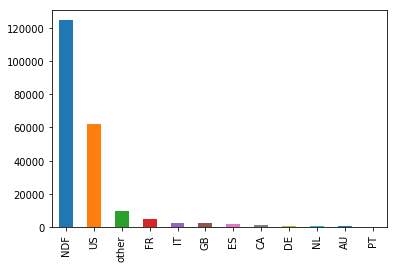

In [36]:
dfs['train_users_2'].country_destination.value_counts().plot.bar()

In [37]:
dfs['train_users_2'].age.describe()

count    125304.000000
mean         49.648535
std         155.565416
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

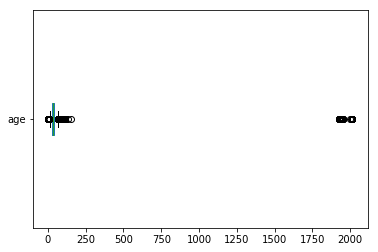

In [38]:
dfs['train_users_2'].age.plot.box(vert=False)

## Multivariate exploration

Observations:
+ unknown gender and NDF are highly correlated
+ When a destination_country speaks the same language as the user, there is an increased probability that the user will go to that country.  However, users overwhelming are going to English speaking destinations, regardless of their chosen language.
+ When a user is young, they are more likely to be female, whereas when they are older, there is equal probability of male or female.

Gender and country destination

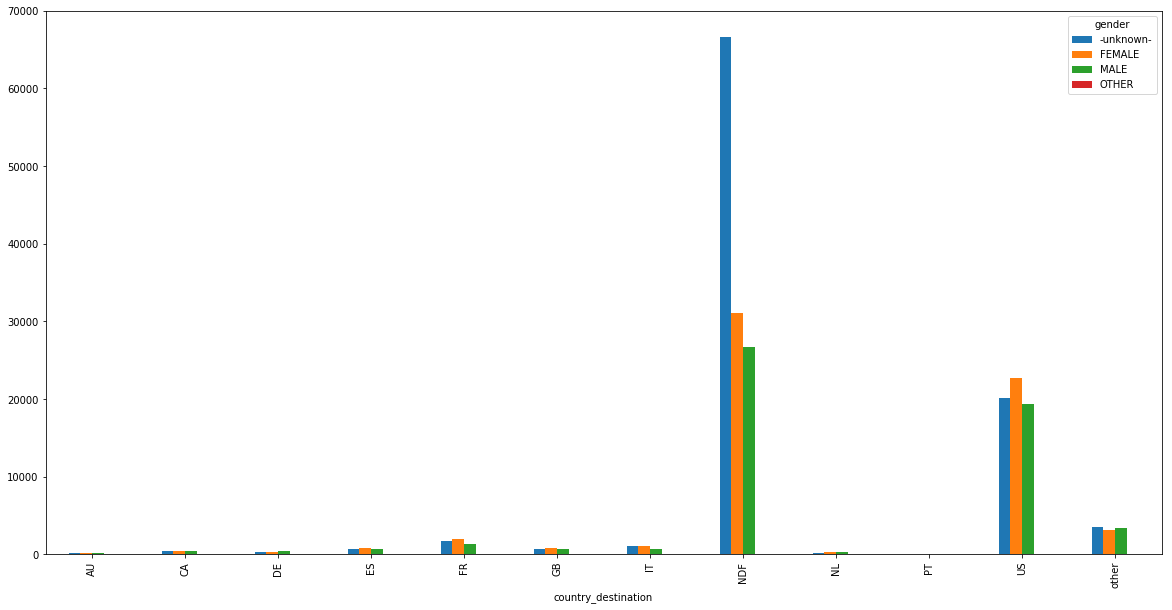

In [39]:
plt.rcParams['figure.figsize'] = [20, 10]
pd.crosstab(dfs['train_users_2']['country_destination'],dfs['train_users_2']['gender']).plot.bar()

User language and language at destination (excluding language)

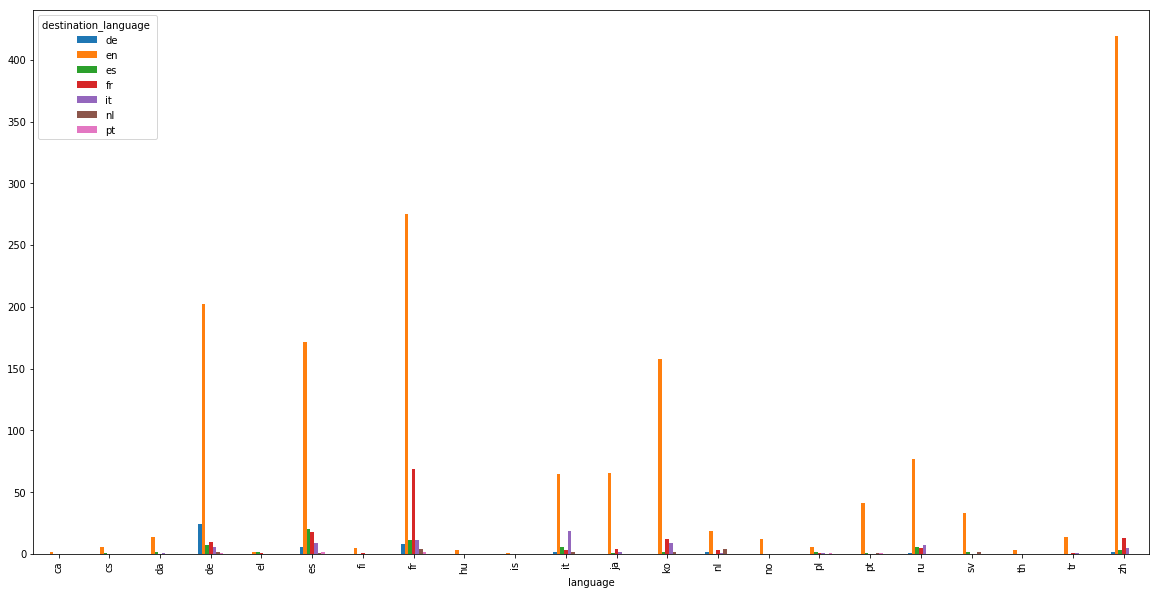

In [40]:
joined_country = dfs['train_users_2'].join(dfs['countries'].set_index('country_destination'), on='country_destination')
joined_country_no_english = joined_country[joined_country['language'] != 'en']
plt.rcParams['figure.figsize'] = [20, 10]
ct = pd.crosstab(joined_country_no_english['language'],joined_country_no_english['destination_language ']).plot.bar()

Age and gender among users

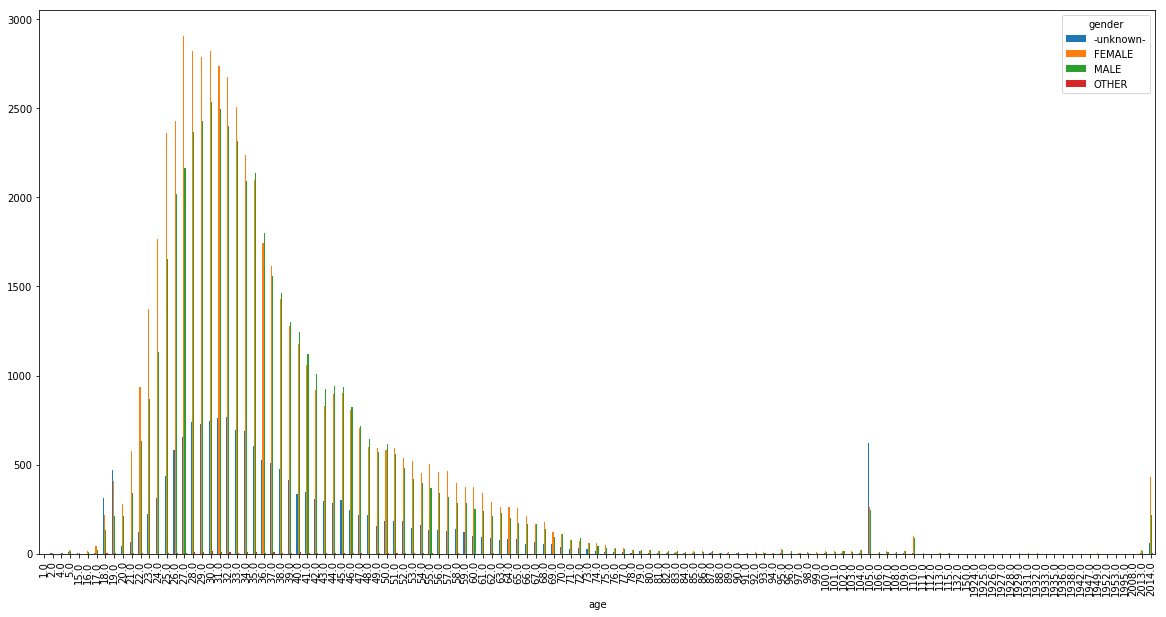

In [41]:
pd.crosstab(dfs['train_users_2']['age'],dfs['train_users_2']['gender']).plot.bar()

# Full Structure of Solution

- Code below is commented out due to being work-in-progress and not functional at the moment.

## Initial Pipeline

+ Start with just train_users_2.  Adding the other tables would require feature engineering.
  + The countries and age_buckets data can only be joined on country_destination, which does not exist in the training data.
  + The sessions data would result in a one-to-many join, which isn't the right format for training a model.  We should summarize the sessions data and then join it to the train and test such that it would be a 1-to-1 join.
+ The dictionary `dfs` contains the data frames that we will work on.
+ We can't easily train on date or text of data.  These will be have to be engineered into another column.
+ One feature was added during cleaning: `delta_creation_active`, which is difference between date_account_created and date_first_active.

Notes on the code below
+ The column transformer will drop columns that aren't explicitly specified.
+ StandardScaler is used for numerical/continuous data.
+ OneHotEncoder is used for categorical data.

In [42]:
test = pd.DataFrame({'days': [0,30,40,45]})
test['range'] = pd.cut(test.days, [0,30,60], include_lowest=True,right=True)
display(test)

,days,range
0,0,"(-0.001, 30.0]"
1,30,"(-0.001, 30.0]"
2,40,"(30.0, 60.0]"
3,45,"(30.0, 60.0]"


In [65]:
# import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

# Step 2
# Read in training and test data from csv files.
# train_user = pd.read_csv('unzipped_data/train_users_2.csv')
# test_user = pd.read_csv('unzipped_data/test_users.csv')

# Step 3
# Split into data and labels (panda dataframes).
#reduced this to 10k / 213k since it was taking forever to even test anything
train_data   = dfs["train_users_2"][:30000].iloc[:, 0:-1] #we should randomize since accounts are in chronological order
train_labels = dfs["train_users_2"][:30000]["country_destination"].ravel()
test_data    = dfs["test_users"]

# Step 4
# Clean and pre-process training data (e.g., filter missing/invalid entries).
# Use OneHotEncoding and StandardScaler on features

#Function to bucket ages prior to one-hot encoding
def age_bucketer(df_input):
    df = df_input
    df.loc[(pd.isnull(df.age), 'age_bucket')] = 'unknown'
    df.loc[(pd.notnull(df.age), 'age_bucket')] = pd.cut(df['age'],
                                                        [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94,99,10000],
                                                        labels=['0-4', '5-9', '10-14','15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                                                                '50-54', '55-59','60-64', '65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'],
                                                       include_lowest=True)
    return df.drop(['age'], axis=1)

#Since NaN's in categorical data will cause issues with our pipeline we will replace that with "unknown".
def clean_first_affiliate_tracked_nulls(df_input):
    df_input['first_affiliate_tracked'] = df_input['first_affiliate_tracked'].fillna("unknown", inplace=False)
    return df_input

#Add month and year features
def feature_creator (df_input):
    df = df_input
    df['first_active_date'] = pd.to_datetime(df.timestamp_first_active,format='%Y%m%d%H%M%S')
    df['year_first_active'] = df['first_active_date'].dt.year
    df['month_first_active'] = df['first_active_date'].dt.month
    return df.drop(['first_active_date'], axis=1)

#Add session features
#dfs['sessions'].groupby('user_id').agg({"secs_elapsed": np.sum, "device_type": pd.Series.nunique, 'action': 'count'}).reset_index(
#    ).rename(columns={'secs_elapsed':'total_time', 'device_type':'unique_device_types', 'action': 'unique_actions'})

column_transformer = make_column_transformer(
     (['gender',
       'signup_method',
       'signup_flow',
       'language',
       'affiliate_channel',
       'affiliate_provider',
       'first_affiliate_tracked',
       'signup_app',
       'first_device_type',
       'first_browser',
       'age_bucket'
     ], OneHotEncoder(handle_unknown='ignore')),remainder='drop') # when we add in sessions features we will want to pass remainders
preprocessor = make_pipeline(
    FunctionTransformer(age_bucketer, validate=False),
    FunctionTransformer(feature_creator, validate=False),
    FunctionTransformer(clean_first_affiliate_tracked_nulls, validate=False),
    column_transformer)



# Step 7
# Generate predictions for test data to submit to Kaggle for scoring.
# predictions = clf.predict(test_data)

/home/cventura/anaconda3/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:739: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [86]:
from scipy.sparse import csr_matrix
data=preprocessor.fit_transform(train_data)
sp_arr = csr_matrix(data)
sdf = pd.SparseDataFrame(sp_arr)

sdf.shape

(30000, 131)

In [95]:
# Step 5
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
bnb = BernoulliNB()
#bnbpipeline = make_pipeline(preprocessor, bnb)
rf = RandomForestClassifier(n_jobs = -1)
#rfpipeline = make_pipeline(preprocessor, rf)
lr = LogisticRegression()
#lrpipeline = make_pipeline(preprocessor, lr)


# bnb_model = cross_validate(bnbpipeline, train_data, train_labels,
#                      scoring=["f1_macro"],
#                      return_train_score=True, cv=3, n_jobs = -1)

# rf_model = cross_validate(rfpipeline, train_data, train_labels,
#                      scoring=["f1_macro"],
#                      return_train_score=True, cv=3, n_jobs = -1)

# lr_model = cross_validate(lrpipeline, train_data, train_labels,
#                      scoring=["f1_macro"],
#                      return_train_score=True, cv=3, n_jobs = -1)

vc = VotingClassifier(estimators = [('bnb', bnb), ('rf', rf), ('lr', lr)], voting='hard')

pipeline = make_pipeline(preprocessor, vc)

final_model = cross_validate(pipeline, train_data, train_labels,
                      scoring=["f1_macro"],
                      return_train_score=True, cv=3, n_jobs = -1)


In [96]:
display(pd.DataFrame(final_model))

,fit_time,score_time,test_f1_macro,train_f1_macro
0,4.113975,0.364459,0.093813,0.154984
1,4.316767,0.344584,0.098824,0.165757
2,4.348206,0.373079,0.094616,0.172725


## Final Pipeline

In [ ]:
# Step 1
# Load necessary Python packages.

# Step 2
# Read in all given csv files for training and test.

# Step 3
# Split into data and labels (panda dataframes).
# train_data   = train_user.iloc[:, 0:-1]
# train_labels = train_user.iloc[:, -1:]
# test_data    = test_user.iloc[:, 0:-1]
# test_labels  = test_user.iloc[:, -1:]

# Step 4
# Clean training and test data (e.g., filter missing/invalid entries).

# Step 5
# Explore alternate encoding strategies compared to OneHotEncoder and StandardScaler using all datasets.
# Create pipelines that can test strategies and be applied with multiple classifiers.
# Pipelines also simplify usage of test data by ensuring that it receives equal processing.

# Step 6
# Use feature engineering to create new features from all training data: users, sessions, age_gender_bkts, countries.
# Apply feature engineering to create same set of new features for both training and test datasets.
# Examples of new features: transform age features into buckets, calculate lag features (e.g., time between first booking and account creation).

# Step 7
# Train several basic classifiers: KNN, decision tree, NB, etc.
# Time permitting, train more complex classifiers: random forest, neural network, etc.

# Step 8
# Ensemble Learning - add meta-classifier to combine predictions of all classifiers from previous step.

# Step 9
# Validate prediction model using techniques: random subampling and bootstrapping.
# Resolve any issues found (e.g., data leakage).

# Step 10
# Get accuracy using test data.

# Step 11
# Generate predictions for test data to submit to Kaggle for scoring.

# References

[1] “Airbnb New User Bookings - Description” Kaggle, 24 Nov. 2015, https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings#description.

[2] Molnar, Christoph “Feature Importance” Interpretable Machine Learning, https://christophm.github.io/interpretable-ml-book/feature-importance.html.

[3] Fisher, Rudin, and Dominici “All Models are Wrong but many are Useful: Variable Importance for Black-Box, Proprietary, or Misspecified Prediction Models, using Model Class Reliance” arXiv, https://arxiv.org/abs/1801.01489v3.

[4] “Airbnb New User Bookings - Evaluation” Kaggle, 24 Nov. 2015, https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings#evaluation.

[5]  Smolyakov, Vadim. “Ensemble Learning to Improve Machine Learning Results.” <i>Stats and Bots</i>, 22 Aug. 2017, blog.statsbot.co/ensemble-learning-d1dcd548e936.

[6]  Zinkevich, M. 2017. Rules of Machine Learning: Best Practices for ML Engineering.  http://martin.zinkevich.org/rules_of_ml/rules_of_ml.pdf.

[7]  “Airbnb New User Bookings, Winner's Interview: 2nd Place, Keiichi Kuroyanagi (@Keiku).” <i>No Free Hunch</i>, 15 Mar. 2016, blog.kaggle.com/2016/03/17/airbnb-new-user-bookings-winners-interview-2nd-place-keiichi-kuroyanagi-keiku/.

[8]  Shekhar, Amit. “What Is Feature Engineering for Machine Learning? – MindOrks – Medium.” <i>Medium.com</i>, Medium, 14 Feb. 2018, medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a.

[9]  “Airbnb New User Bookings, Winners Interview: 3rd Place: Sandro Vega Pons.” <i>No Free Hunch</i>, 15 Mar. 2016, blog.kaggle.com/2016/03/07/airbnb-new-user-bookings-winners-interview-3rd-place-sandro-vega-pons/.

[10]  Kumar, Ajitesh. “Machine Learning: Validation Techniques - DZone AI.” <i>Dzone.com</i>, 12 Feb. 2018, dzone.com/articles/machine-learning-validation-techniques.

[11]  Brownlee, Jason. “Data Leakage in Machine Learning.” <i>Machine Learning Mastery</i>, 31 July 2018, machinelearningmastery.com/data-leakage-machine-learning/.

[12]  Brownlee, Jason. “A Gentle Introduction to XGBoost for Applied Machine Learning.” <i>Machine Learning Mastery</i>, 21 Sept. 2016, machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/.